In [1]:
import numpy as np
import math

### CUT AND COUNT 

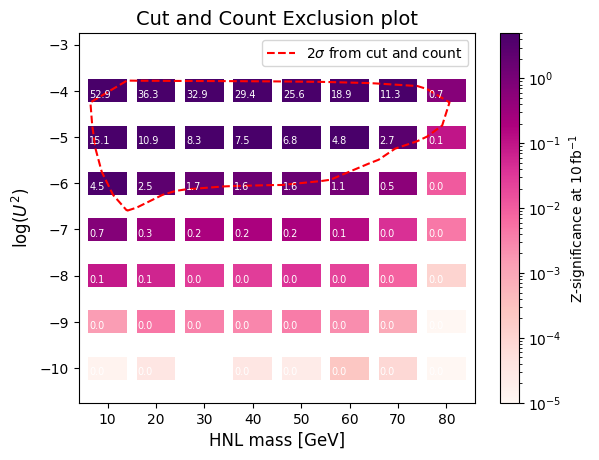

In [112]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

def make_hist_2D():

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.7015996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 0.001475996382017464], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.304537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 0.004537376980651871], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.2033373434392724114], ["30", -8.0, 0.029476881359299892],["30", -9.0, 0.0033373434392724114], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.2029276961561613734], ["40", -8.0, 0.02821520628356613],["40", -9.0, 0.0029276961561613734], ["40", -10.0, 3.352827837383747e-05], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.203920231273620948], ["50", -8.0, 0.03817629371414823],["50", -9.0, 0.003920231273620948], ["50", -10.0, 2.352827837383747e-05], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.13230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 0.00230040705768753], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0408222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 0.0008222118582734013], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 0.00423984398430349], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 9.878873485179866e-06], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]


    plt.hist2d(masses_cc, angles_cc, bins=n_bins, range=[x_range, y_range], weights=significances_cc, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses_cc, angles_cc), bins=n_bins, range=[x_range, y_range], weights=significances_cc)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \, \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    # Perform the interpolation
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    # Contour lines
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    # Create legend entries
    legend_elements = [
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("Cut and Count Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('cut_and_count_10fb.pdf', format='pdf')
    plt.show()

make_hist_2D()

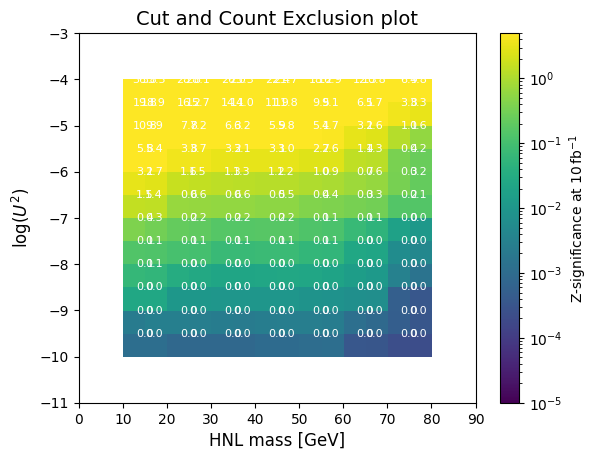

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D

def make_imshow_2D():
    # Define the specific range and bins of interest
    x_range = (0, 90)  # Adjusted from 0-90 to 4-86
    y_range = (-11, -3)  # Adjusted from -11--3 to -10.75--3.25
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.linspace(-10.75, -3.25, 16)  # 16 intervals to match y-axis data points

    # Data points: mass, angle, significance
    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.7015996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 0.001475996382017464], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.304537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 0.004537376980651871], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.2033373434392724114], ["30", -8.0, 0.029476881359299892],["30", -9.0, 0.0033373434392724114], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.2029276961561613734], ["40", -8.0, 0.02821520628356613],["40", -9.0, 0.0029276961561613734], ["40", -10.0, 3.352827837383747e-05], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.203920231273620948], ["50", -8.0, 0.03817629371414823],["50", -9.0, 0.003920231273620948], ["50", -10.0, 2.352827837383747e-05], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.13230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 0.00230040705768753], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0408222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 0.0008222118582734013], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 0.00423984398430349], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 9.878873485179866e-06], ["80", -10.0, 1.2065998272242434e-06]]


    masses_cc = [data[0] for data in data_points_cc]
    angles_cc = [data[1] for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Create mesh grid
    x_mesh, y_mesh = np.meshgrid(x_bins, y_bins)

    # Interpolate values
    z_values = griddata((masses_cc, angles_cc), significances_cc, (x_mesh, y_mesh), method='linear')

    # Plot using imshow
    cmap = plt.cm.viridis
    norm = LogNorm(vmin=1e-5, vmax=5)
    plt.imshow(z_values, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], origin='lower', aspect='auto', cmap=cmap, norm=norm)
    plt.colorbar(label='Z-significance at $10 \, \mathrm{fb}^{-1}$')

    # Adding text annotations in the center of each interpolated "bin"
    dx = np.diff(x_bins)[0] / 2  # Calculate half the bin width
    dy = np.diff(y_bins)[0] / 2  # Calculate half the bin height
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            if not np.isnan(z_values[j, i]):
                plt.text(x_bins[i] + dx, y_bins[j] + dy, f"{z_values[j, i]:.1f}", 
                         ha='center', va='center', color='w', fontsize=8)

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("Cut and Count Exclusion plot", fontsize=14)
    plt.show()

make_imshow_2D()


### BDT

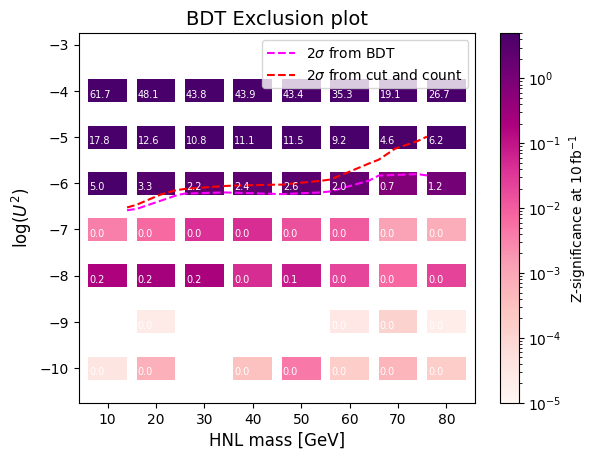

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results.json', 'r') as file:
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    
    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        data_points.append((mass, angle, highest_significance))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \, \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb.pdf', format='pdf')
    plt.show()

make_hist_2D()

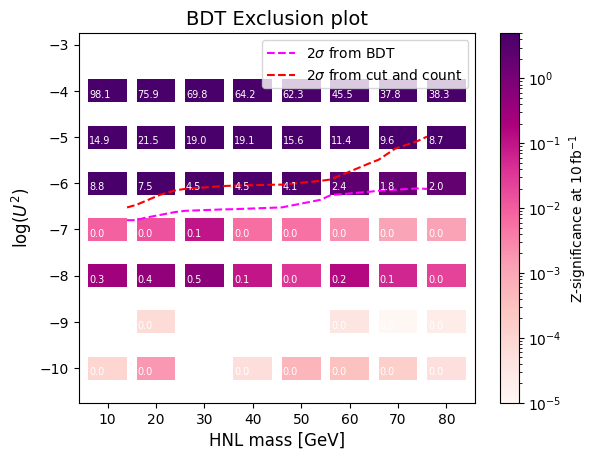

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results2.json', 'r') as file:
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    
    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        data_points.append((mass, angle, highest_significance))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \, \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb.pdf', format='pdf')
    plt.show()

make_hist_2D()

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results3.json', 'r') as file:
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    
    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        data_points.append((mass, angle, highest_significance))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \, \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb.pdf', format='pdf')
    plt.show()

make_hist_2D()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_1206/535869921.py:77: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_1206/535869921.py:78: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


Area enclosed by BDT 2σ contour: -399.20573375664276
Area enclosed by Cut and Count 2σ contour: -365.77418875422234
Difference in areas: -33.43154500242042
Percentage Improvement: 9.14%


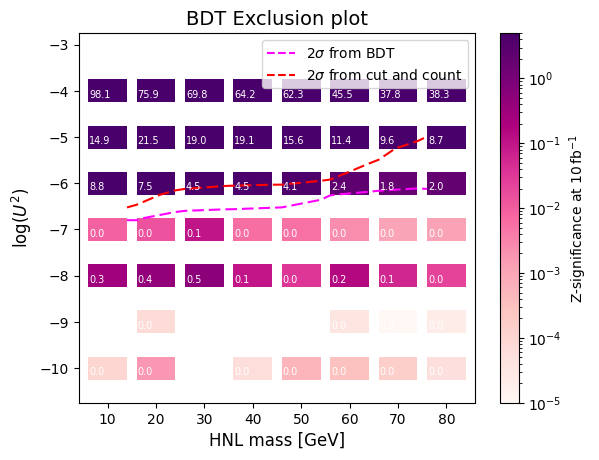

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results2.json', 'r') as file:
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    
    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        data_points.append((mass, angle, highest_significance))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \, \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb.pdf', format='pdf')
    plt.show()

make_hist_2D()

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_4794/378956826.py:77: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_4794/378956826.py:78: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


Area enclosed by BDT 2σ contour: -397.1451613341439
Area enclosed by Cut and Count 2σ contour: -365.77418875422234
Difference in areas: -31.370972579921556
Percentage Improvement: 8.58%


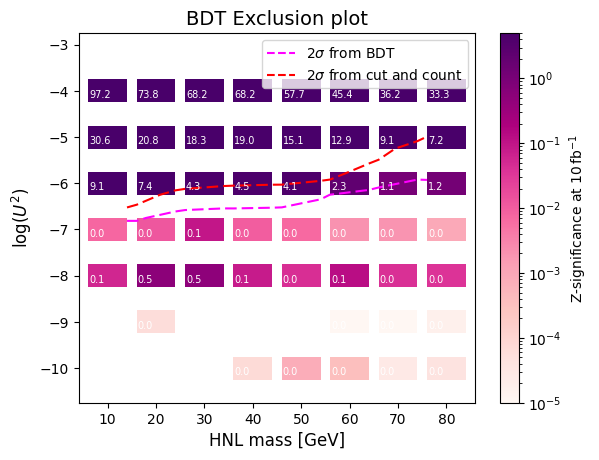

In [1]:
### plot for D0 inc, between 0.8 and 1.0, 2000 bins ###
### 30 GeV filter on the lead electron energy , LR significance (from right most bin to left most bin) ###

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results4.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        data_points.append((mass, angle, highest_significance))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \, \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb.pdf', format='pdf')
    plt.show()

make_hist_2D()

## BDT WITH REAL HNL SIGNALS ##

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76303/6882222.py:82: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76303/6882222.py:83: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


Area enclosed by BDT 2σ contour: -403.49813762798544
Area enclosed by Cut and Count 2σ contour: -365.77418875422234
Difference in areas: -37.723948873763106
Percentage Improvement: 10.31%


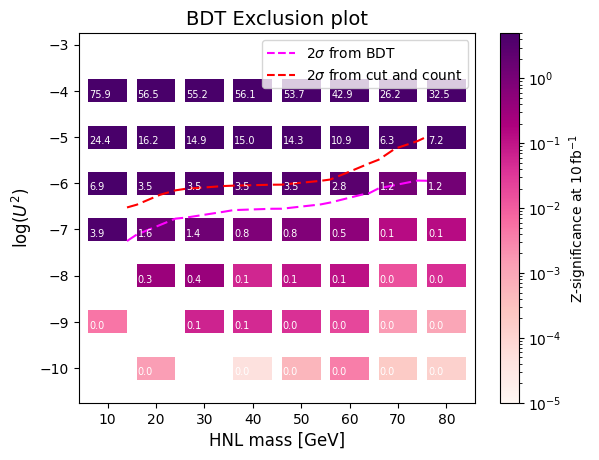

In [3]:
### 28 Feb new plot with new HNLs i hope its better dear god ###

### plot for D0 inc, between 0.8 and 1.0, 2000 bins ###
### 30 GeV filter on the lead electron energy , LR significance (from right most bin to left most bin) ###

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results6_10fb.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        data_points.append((mass, angle, highest_significance))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \, \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb.pdf', format='pdf')
    plt.show()

make_hist_2D()

bdt cuts list [0.9931999316824351, 0.9999999990098902, 0.999999999009891, 0.9999999990098902, 0.9997999970296706, 0.9998999980197805, 0.9997999966762879, 0.9999999990098903, 0.9918999188112214, 0.9999999990098902, 0.9999999990098902, 0.9998999980197805, 0.9999999990098902, 0.9998999958994844, 0.9999999990098902, 0.9995999950494571, 0.9461994663315733, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9998999980197804, 0.9989999878130559, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.999699995097207, 0.9996999960395608, 0.9993999930692316, 0.9977999772274747, 0.9999999990098902, 0.9994999940593456, 0.999899997313015, 0.9999999990098902, 0.0, 0.8989989394572425, 0.999899997784192, 0.9999999990098902, 0.9994999937059585, 0.9997999970296707, 0.999899997784192, 0.9998999980197804, 0.9999999990098905, 0.9998999980197806, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.999599995049451, 0.9999999990098902, 0.9999999990098902, 0.9998

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_1812/1533610904.py:89: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_1812/1533610904.py:90: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


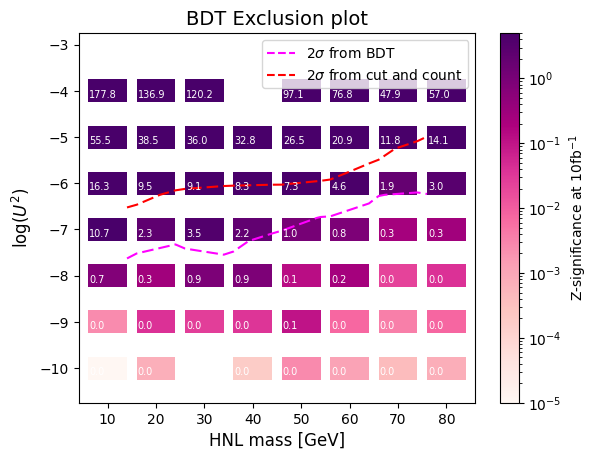

In [88]:
## run 7 ##

### 28 Feb new plot with new HNLs i hope its better dear god ###

### plot for D0 inc, between 0.8 and 1.0, 2000 bins ###
### 30 GeV filter on the lead electron energy , LR significance (from right most bin to left most bin) ###

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results6_10fb.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run7.pdf', format='pdf')
    plt.show()

make_hist_2D()


bdt cuts list [0.9998999980197896, 0.9987999603529161, 0.9272992792310621, 0.8989956677920263, 0.037037037037037035, 0.898919219979908, 0.0, 0.9183922142371095, 0.9306992311643649, 0.9950999475716549, 0.9978999769392959, 0.9458994314411359, 0.001001001001001001, 0.8989377767621359, 0.8989989989993271, 0.9153869914425585, 0.9747977826242481, 0.9998999980197867, 0.9997999970297184, 0.9298991809399352, 0.9018605092868798, 0.9547961901490638, 0.9726926767757023, 0.9999999990098959, 0.9998999980199492, 0.9997999970300407, 0.8989364738615371, 0.9932999326725636, 0.9991999910890119, 0.9989999891087951, 0.9995999950494512, 0.9999999990098934, 0.9998999980197827, 0.9888998561284428, 0.999499993706715, 0.9995999794424446, 0.9974995301782063, 0.9985999586447558, 0.9998999979020196, 0.9984999841583092, 0.998899988118683, 0.9994999940593419, 0.9911981296621741, 0.9892903372795734, 0.9977999745182253, 0.9996999852032961, 0.9987999794769467, 0.9998999980200347, 0.9899968199917666, 0.9921999031700942,

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_7096/2390144288.py:91: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_7096/2390144288.py:92: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


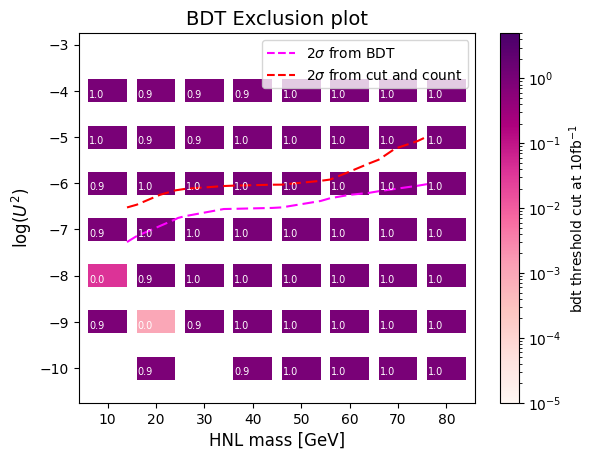

In [7]:
# bdt cut list #

## run 7 ##

### 28 Feb new plot with new HNLs i hope its better dear god ###

### plot for D0 inc, between 0.8 and 1.0, 2000 bins ###
### 30 GeV filter on the lead electron energy , LR significance (from right most bin to left most bin) ###

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results7_10fb.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=bdt_cuts, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=bdt_cuts)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'bdt threshold cut at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run7.pdf', format='pdf')
    plt.show()

make_hist_2D()



means for the variable are [0.039000000804662704, 0.3499999940395355, 3.509000062942505, 35.380001068115234, 39.119998931884766, 0.0, 0.0, 0.004000000189989805, 0.012000000104308128, 0.09600000083446503, 0.9520000219345093, 9.42300033569336, 87.00299835205078, 53.91400146484375, 0.004000000189989805, 0.004000000189989805, 0.012000000104308128, 0.10199999809265137, 1.0019999742507935, 10.02400016784668, 0.003000000026077032, 0.003000000026077032, 0.004000000189989805, 0.01899999938905239, 0.18199999630451202, 1.746999979019165, 17.492000579833984, 0.003000000026077032, 0.003000000026077032, 0.003000000026077032, 0.006000000052154064, 0.041999999433755875, 0.4090000092983246, 3.9030001163482666, 0.003000000026077032, 0.003000000026077032, 0.003000000026077032, 0.003000000026077032, 0.012000000104308128, 0.10199999809265137, 1.0329999923706055, 0.003000000026077032, 0.003000000026077032, 0.003000000026077032, 0.003000000026077032, 0.004000000189989805, 0.02500000037252903, 0.2389999926090

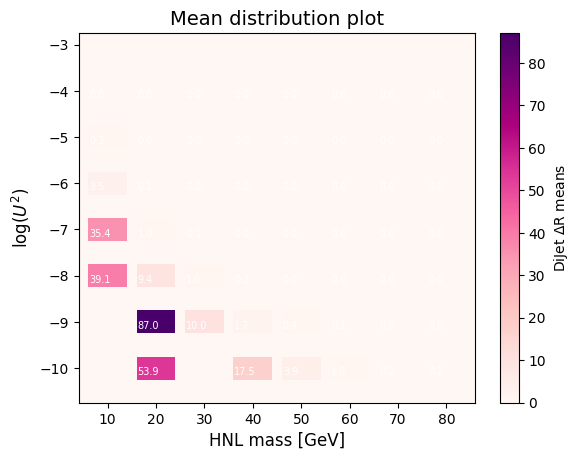

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('signal_means.json', 'r') as file:
    data = json.load(file)
    
def make_hist_2D():
    # 10 fb-1 data
    data_points = []
    variable = "RecoElectronTrack_absD0"
    means = []  # Define means list here

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        means.append(value.get(variable, 0))  # Append mean values

        data_points.append((mass, angle))

    masses = [data[0] for data in data_points]
    angles = [data[1] * 2 for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"means for the variable are {means}")

    norm = Normalize(vmin=min(means), vmax=max(means))

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=means, cmap=cmap, norm=norm, density=False)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=means)
    x_edges, y_edges = edges
    
    plt.colorbar(label=f'DiJet $\Delta$R means')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("Mean distribution plot", fontsize=14)

    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    plt.savefig(f'{variable}_mean.pdf', format='pdf')
    plt.show()

make_hist_2D()


bdt cuts list [0.9931999316824351, 0.9999999990098902, 0.999999999009891, 0.9999999990098902, 0.9997999970296706, 0.9998999980197805, 0.9997999966762879, 0.9999999990098903, 0.9918999188112214, 0.9999999990098902, 0.9999999990098902, 0.9998999980197805, 0.9999999990098902, 0.9998999958994844, 0.9999999990098902, 0.9995999950494571, 0.9461994663315733, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9998999980197804, 0.9989999878130559, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.999699995097207, 0.9996999960395608, 0.9993999930692316, 0.9977999772274747, 0.9999999990098902, 0.9994999940593456, 0.999899997313015, 0.9999999990098902, 0.0, 0.8989989394572425, 0.999899997784192, 0.9999999990098902, 0.9994999937059585, 0.9997999970296707, 0.999899997784192, 0.9998999980197804, 0.9999999990098905, 0.9998999980197806, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9992999916079451, 0.999599995049451, 0.9999999990098902, 0.9999

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_1812/1300613578.py:89: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_1812/1300613578.py:90: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


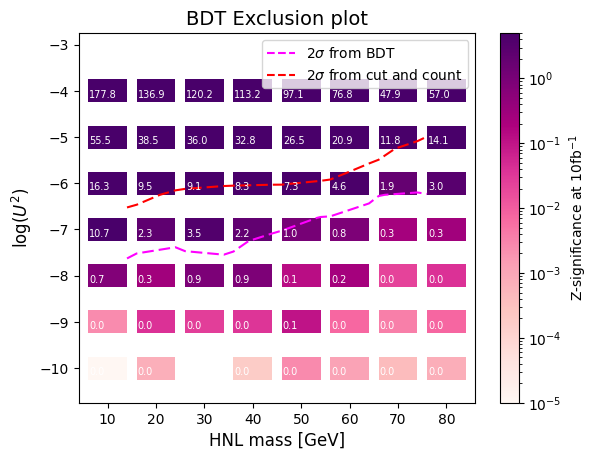

In [91]:
## run 7 ##

### 28 Feb new plot with new HNLs i hope its better dear god ###

### plot for D0 inc, between 0.8 and 1.0, 2000 bins ###
### 30 GeV filter on the lead electron energy , LR significance (from right most bin to left most bin) ###

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results10_10fb.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run10.pdf', format='pdf')
    plt.show()

make_hist_2D()


bdt cuts list [0.9999999990098902, 0.9998999979019862, 0.9999999990098902, 0.9999999990098902, 0.9998999980197804, 0.9998999980197804, 0.9998999979019861, 0.9999999990098902, 0.9999999990098902, 0.9998999980197804, 0.9997999970296708, 0.9998999980197805, 0.9998999980197804, 0.9998999979019861, 0.9998999980197804, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9998999979019861, 0.0, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9997999970296708, 0.9999999990098902, 0.9998999980197804, 0.9999999990098902, 0.9996999960395608, 0.9998999979019862, 0.9999999990098902, 0.9999999990098902, 0.9996999960395608, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9996999960395613, 0.992599925741767, 0.9999999990098902, 0.9998999980197805, 0.9999999990098902, 0.9999999990098902, 0.9998999980197805, 0

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_32261/18316951.py:86: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_32261/18316951.py:87: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


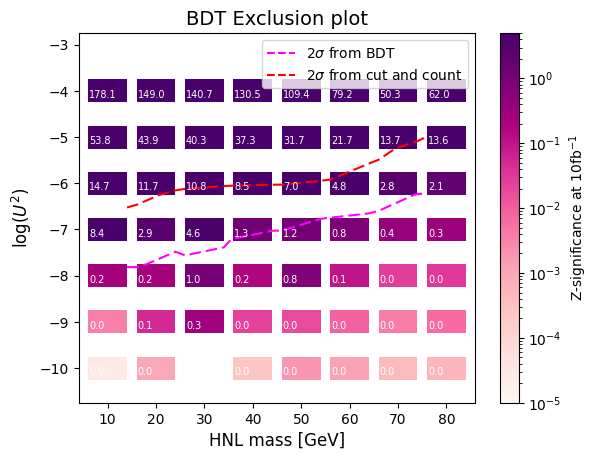

In [3]:
## RUN 11 -- 15 GeV Filter -- ##

## 22 March 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results11_10fb.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run11.pdf', format='pdf')
    plt.show()

make_hist_2D()


/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76150/1568412907.py:87: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76150/1568412907.py:88: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


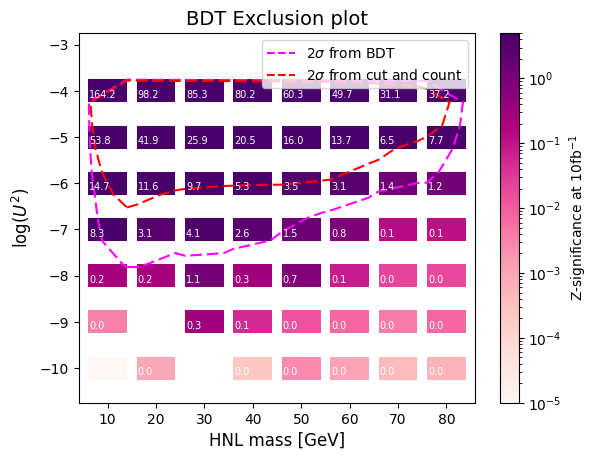

In [19]:
## RUN 12 Prompt Decay ###
## RUN 11 -- 15 GeeV Filter -- ##

## 22 March 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results12_10fb.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        #bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points] # * 122.47 for 150 ab
    #bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    #print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear',fill_value=0)
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    """    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")"""
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run12_LLP.pdf', format='pdf')
    plt.show()

make_hist_2D()



/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/4164864868.py:53: UserWarning: The following kwargs were not used by contour: 'fill_value'
  cs = plt.contour(mass_grid, angle_grid, significance_grid, levels=[sigma_2_level], colors='yellow', linestyles='dashed', linewidths=1.5,fill_value=0)


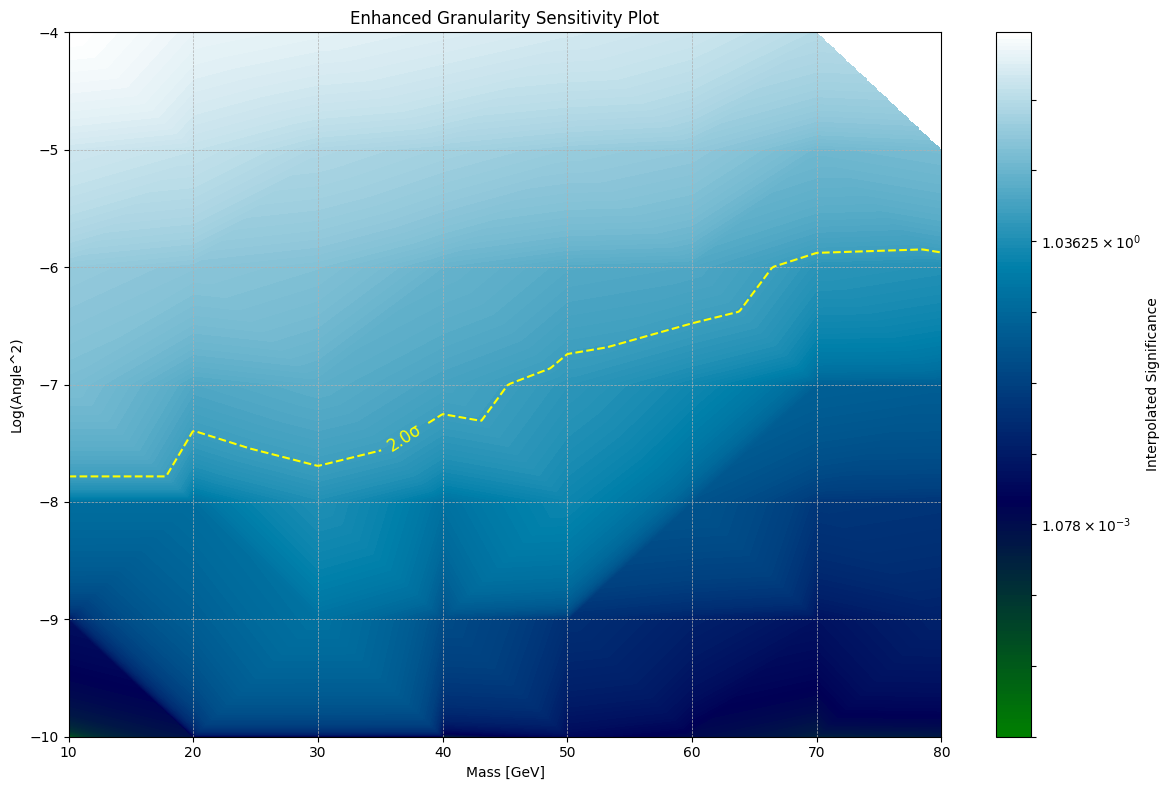

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.interpolate import griddata
from matplotlib.colors import LogNorm
from matplotlib import cm  # For colormap references

# Load data
with open('test_xgboost_results12_10fb.json', 'r') as file:
    data = json.load(file)

# Data extraction and preparation
masses, angles, significances = [], [], []
for key, value in data.items():
    parts = key.split('_')
    mass = float(parts[1].replace('GeV', ''))
    angle_str = parts[2]
    angle = float(angle_str.replace('1e-', '-').replace('p', '.'))
    highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]

    masses.append(mass)
    angles.append(angle * 2)  # Adjust for angle^2 in log scale
    significances.append(highest_significance)

masses = np.array(masses)
angles = np.array(angles)
significances = np.array(significances)

# Define the grid for interpolation
mass_grid, angle_grid = np.meshgrid(np.linspace(masses.min(), masses.max(), 500),
                                    np.linspace(angles.min(), angles.max(), 500))

# Interpolate the significance values
significance_grid = griddata((masses, angles), significances, (mass_grid, angle_grid), method='linear')

# Plotting adjustments
plt.figure(figsize=(12, 8))

# Creating more granularity in contour levels
min_significance = np.nanmin(significances)
max_significance = np.nanmax(significances)
levels = np.geomspace(min_significance, max_significance, num=200)  # Fine-tuned level spacing

contour = plt.contourf(mass_grid, angle_grid, significance_grid, levels=levels, cmap='ocean', norm=LogNorm(vmin=min_significance, vmax=max_significance))
plt.colorbar(contour, label='Interpolated Significance')

plt.xlabel('Mass [GeV]')
plt.ylabel('Log(Angle^2)')
plt.title('Enhanced Granularity Sensitivity Plot')

# Add 2σ contour line for better visualization
sigma_2_level = 2
cs = plt.contour(mass_grid, angle_grid, significance_grid, levels=[sigma_2_level], colors='yellow', linestyles='dashed', linewidths=1.5,fill_value=0)
plt.clabel(cs, fmt='%2.1fσ', colors='yellow', fontsize=12)

plt.xlim(10, 80)
plt.ylim(-10, -4)

plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.savefig('enhanced_granularity_sensitivity_plot.pdf')
plt.show()


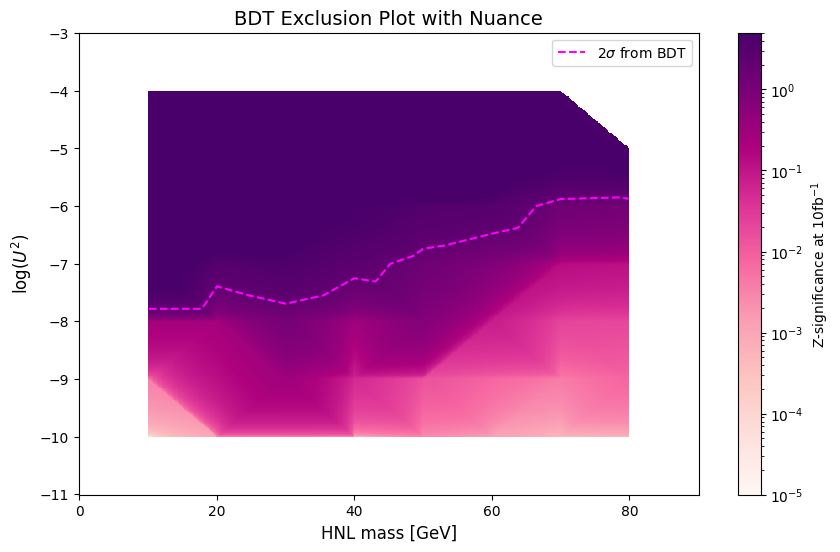

In [71]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

# Load data
with open('test_xgboost_results12_10fb.json', 'r') as file:
    data = json.load(file)

def make_hist_2D():
    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Extracting the mass
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))  # Converting the mixing angle
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Extracting the BDT cut

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]  # Squaring the angle
    significances = [data[2] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)

    # Interpolate on a denser grid for nuanced visualization
    x_grid_dense, y_grid_dense = np.meshgrid(np.linspace(x_range[0], x_range[1], 500), np.linspace(y_range[0], y_range[1], 500))
    z_interp_linear = griddata((masses, angles), significances, (x_grid_dense, y_grid_dense), method='linear')

    plt.figure(figsize=(10, 6))
    cmap = plt.cm.RdPu
    norm = LogNorm(vmin=1e-5, vmax=5)

    plt.pcolormesh(x_grid_dense, y_grid_dense, z_interp_linear, cmap=cmap, norm=norm, shading='auto')
    plt.colorbar(label='Z-significance at $10 \mathrm{fb}^{-1}$')

    # Adding dashed lines for 2 sigma contours, if needed
    threshold = 2.0
    contour_2sigma_linear = plt.contour(x_grid_dense, y_grid_dense, z_interp_linear, levels=[threshold], colors='magenta', linestyles='dashed')

    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT')]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion Plot with Nuance", fontsize=14)
    plt.savefig('exclusionplot_10fb_run12_LLP_nuanced.pdf', format='pdf')
    plt.show()

make_hist_2D()


# LLP VS PROMPT

bdt cuts list [0.9976999635155909, 0.8989989989989993, 0.9985998817839483, 0.9868998615310913, 0.9995999947549663, 0.9992999911367703, 0.9991999714762738, 0.9934999229911363, 0.9993999584377294, 0.9998999980197804, 0.9999999990098902, 0.9995999929880564, 0.9998999955461018, 0.9999999990098902, 0.898998998998999, 0.9998999980197805, -0.07025640797778283, 0.9995999882762832, 0.9990999783194837, 0.9993999914201132, 0.9996999943904417, 0.9978999574858024, 0.9924996517046435, 0.9999999990098902, 0.1021021021021021, 0.9675974386516246, 0.999099988331999, 5.047693674786746e-05, 0.8989984035493993, 0.9966998682136874, 0.9999999990098902, 0.9995999891597427, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.8989967958347644, 0.

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/2148602771.py:89: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/2148602771.py:90: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


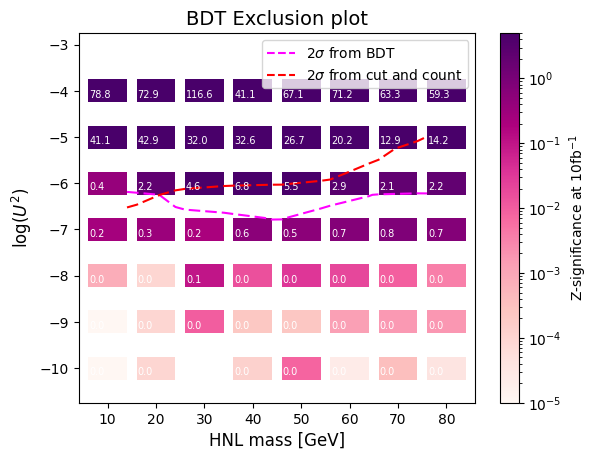

In [26]:
## RUN 13 should extend to higher masses ##

## RUN 12 Prompt Decay ###
## RUN 11 -- 15 GeeV Filter -- ##

## 22 March 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results13_10fb.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run13_LLP.pdf', format='pdf')
    plt.show()

make_hist_2D()



bdt cuts list [0.9997999970296706, 0.898998879993161, 0.9999999990098902, 0.0, 0.9981999800688707, 0.9935999356428653, 0.9998999980197804, 0.9999999990098902, 0.9999999990098902, 0.9987999871285727, 0.9998999980197804, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.999299991607969, 0.9999999990098902, 0.05436644112127731, 0.9998999980197804, 0.9991999910890118, 0.9999999990098902, 0.9997999970296706, 0.9999999990098902, 0.9999999990098902, 0.9703996884456753, 0.9844998455428745, 0.9999999990098902, 0.9999999990098902, 0.9997999968529798, 0.9996999960395608, 0.9997999970296706, 0.9987999871285729, 0.9998999980197804, 0.6543002523319807, 0.9999999990098902, 0.9998999980197804, 0.9999999990098902, 0.9998999979019862]


/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/26448848.py:86: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/26448848.py:87: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


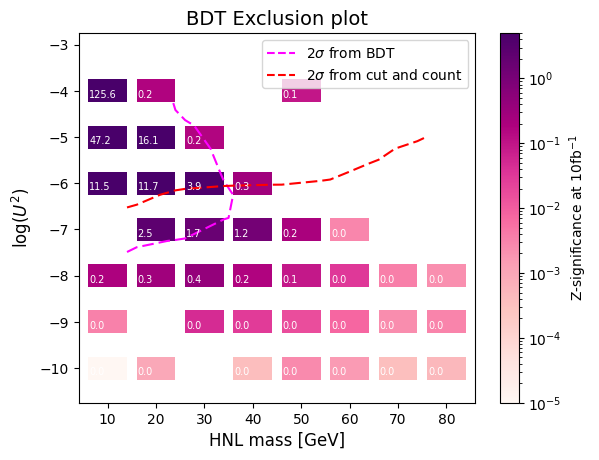

In [34]:
## RUN 14  --> LLPs --> D0_sig > 5 ###

## 8 April 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results14_10fb.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    #area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    #area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    #area_difference = area_contour - area_cc

    #print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    #print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    #print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    #percentage_improvement = (area_difference / area_cc) * 100

    #print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run13_LLP.pdf', format='pdf')
    plt.show()

make_hist_2D()




bdt cuts list [0.9998999980197804, 0.9998999975486035, 0.999699996039561, 0.999599995049451, 0.9998999980197804, 0.9999999990098902, 0.999299992079123, 0.9999999990098902, 0.9998999980197805, 0.9999999990098902, 0.39899899899906555, 0.9999999990098902, 0.9998999980197804, 0.9999999990098902, 0.9999999990098902, 0.9993999885341539, 0.9998999980197805, 0.9999999990098902, 0.9999999990098902, 0.9989999891087923, 0.9998999980197805, 0.9998999980197805, 0.11611611611611611, 0.9997999966762879, 0.9999999990098902, 0.9997999961462141, 0.9997999963229055, 0.9998999979019861, 0.9955999368924694, 0.9999999990098902, 0.9998999979019861, 0.9998999979019862]


/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/1609649033.py:86: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/1609649033.py:87: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


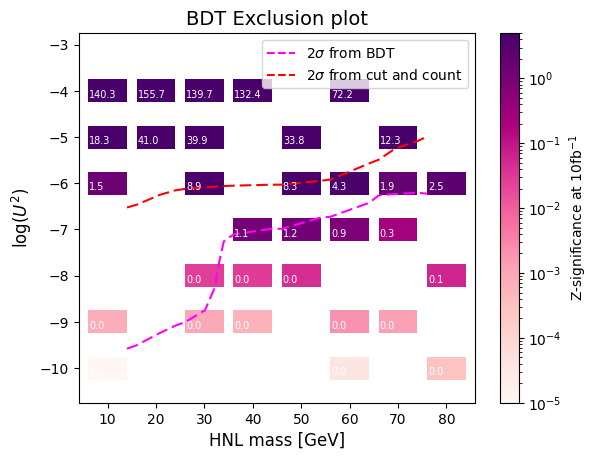

In [36]:
## RUN 15 --> prompt decay --> D0_sig < 5 ###

## 8 April 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('test_xgboost_results15_10fb.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    #area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    #area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    #area_difference = area_contour - area_cc

    #print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    #print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    #print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    #percentage_improvement = (area_difference / area_cc) * 100

    #print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run13_LLP.pdf', format='pdf')
    plt.show()

make_hist_2D()




bdt cuts list [0.11611611611611611, 0.9998999979019862, 0.9998999975486035, 0.9993999885341539, 0.9998999980197805, 0.9995999950494511, 0.9998999980197804, 0.9998999980197805, 0.9997999961462141, 0.9999999990098902, 0.9998999980197804, 0.9989999891087923, 0.9999999990098902, 0.9998999979019861, 0.9999999990098902, 0.999699996039561, 0.9998999980197805, 0.9998999980197804, 0.9998999979019861, 0.9999999990098902, 0.999299992079123, 0.9998999980197805, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9998999980197804, 0.39899899899906555, 0.9998999980197804, 0.9999999990098902, 0.9993999926569517, 0.9997999966762879, 0.9998999980197804, 0.4478980411133276, 0.9998999979019861, 0.9999999990098902, 0.39899899899937274, 0.99959999446048, 0.9999999990098902, 0.9999999990098902, 0.9998999980197804, 0.9998999980197805, 0.9990999865650757, 0.9997999957928313, 0.9997999963229055, 0.9999999990098902, 0.9999999990098902, 0.999599995049451, 0.9999999990098902]


/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/3844744506.py:88: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/3844744506.py:89: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


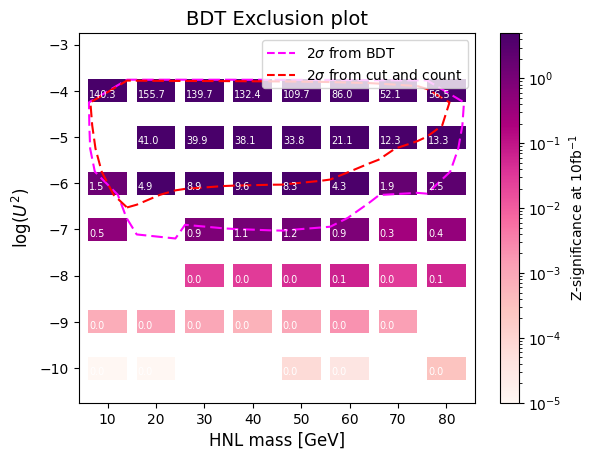

In [77]:
## RUN 15 Prompt decay ##

## RUN 15 --> prompt decay --> D0_sig < 5 ###

## 8 April 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('PromptDecayRun15Results.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear',fill_value=0)
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    #area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    #area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    #area_difference = area_contour - area_cc

    #print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    #print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    #print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    #percentage_improvement = (area_difference / area_cc) * 100

    #print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run13_LLP.pdf', format='pdf')
    plt.show()

make_hist_2D()




bdt cuts list [0.898998998998999, 0.898998998998999, 0.9998999980197804, 0.9844998455428745, 0.9703996884456753, 0.898998879993161, 0.9999999990098902, 0.9999999990098902, 0.9997999970296706, 0.9987999871285729, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9998999980197804, 0.9987999871285727, 0.6543002523319807, 0.9999999990098902, 0.9999999990098902, 0.9998999980197804, 0.05436644112127731, 0.9998999980197804, 0.9998999979019862, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9935999356428653, 0.9996999960395608, 0.9998999980197804, 0.9999999990098902, 0.9991999910890118, 0.9997999970296706, 0.0, 0.9997999970296706, 0.999299991607969, 0.9999999990098902, 0.9999999990098902, 0.9999999990098902, 0.9981999800688707, 0.9997999968529798]


/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/2011515163.py:86: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/2011515163.py:87: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


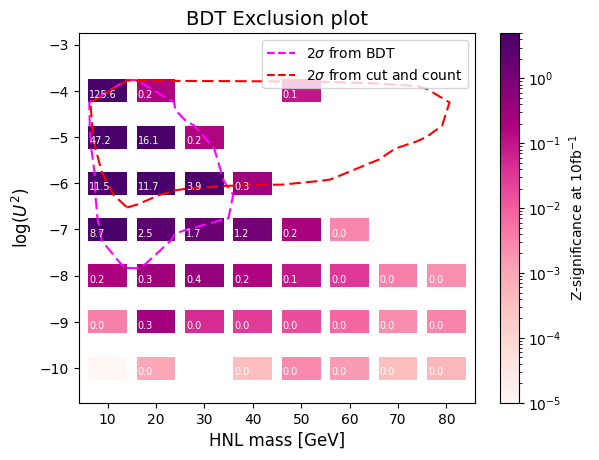

In [76]:
## RUN 14 LLP --> D0_sig > 5 ##

# April 10 2024

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('LLP_Run14Results.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear',fill_value=0)
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    #area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    #area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    #area_difference = area_contour - area_cc

    #print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    #print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    #print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    #percentage_improvement = (area_difference / area_cc) * 100

    #print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run13_LLP.pdf', format='pdf')
    plt.show()

make_hist_2D()




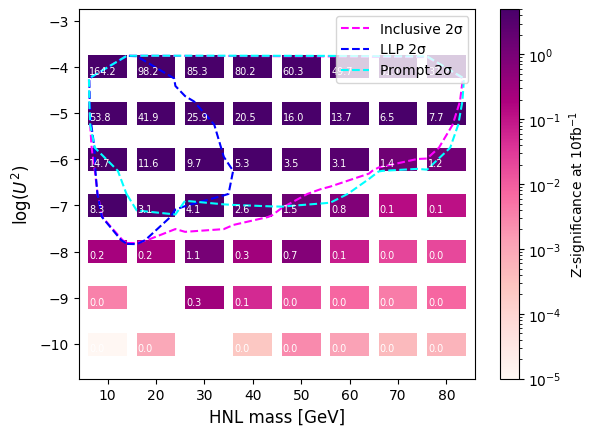

In [106]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

# Load the data for BDT, LLP, and Prompt from JSON files
with open('test_xgboost_results12_10fb.json', 'r') as file:
    data_bdt = json.load(file)
with open('LLP_Run14Results.json', 'r') as file:
    data_llp = json.load(file)
with open('PromptDecayRun15Results.json', 'r') as file:
    data_prompt = json.load(file)

def make_hist_2D():
    # Initialize lists to hold the processed data
    bdt_points, llp_points, prompt_points = [], [], []

    # Process the data from BDT
    for key, value in data_bdt.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        bdt_points.append((mass, angle * 2, highest_significance))

    # Process the data from LLP
    for key, value in data_llp.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        llp_points.append((mass, angle * 2, highest_significance))

    # Process the data from Prompt
    for key, value in data_prompt.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        prompt_points.append((mass, angle * 2, highest_significance))

    # Prepare the bins and ranges
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)
    x_range = (0, 90)
    y_range = (-11, -3)

    # Convert to numpy arrays for griddata
    masses_bdt, angles_bdt, significances_bdt = map(np.array, zip(*bdt_points))
    masses_llp, angles_llp, significances_llp = map(np.array, zip(*llp_points))
    masses_prompt, angles_prompt, significances_prompt = map(np.array, zip(*prompt_points))

    # Create the grids for contour plotting
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    # Interpolate the z-values for contour plotting
    z_interp_bdt = griddata((masses_bdt, angles_bdt), significances_bdt, (x_grid, y_grid), method='linear', fill_value=0)
    z_interp_llp = griddata((masses_llp, angles_llp), significances_llp, (x_grid, y_grid), method='linear', fill_value=0)
    z_interp_prompt = griddata((masses_prompt, angles_prompt), significances_prompt, (x_grid, y_grid), method='linear', fill_value=0)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu


    plt.hist2d(masses_bdt, angles_bdt, bins=n_bins, range=[x_range, y_range], weights=significances_bdt, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses_bdt, angles_bdt), bins=n_bins, range=[x_range, y_range], weights=significances_bdt)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')

    # Plot the contours for BDT, LLP, and Prompt
    plt.contour(x_grid, y_grid, z_interp_bdt, levels=[2], colors='magenta', linestyles='dashed')
    plt.contour(x_grid, y_grid, z_interp_llp, levels=[2], colors='blue', linestyles='dashed')
    plt.contour(x_grid, y_grid, z_interp_prompt, levels=[2], colors='cyan', linestyles='dashed')

    # Add legend for the contours
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='Inclusive 2σ'),
                       Line2D([0], [0], color='blue', linestyle='dashed', label='LLP 2σ'),
                       Line2D([0], [0], color='cyan', linestyle='dashed', label='Prompt 2σ')]
    plt.legend(handles=legend_elements, loc='upper right')


    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    # Add labels and title
    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)

    # Save the plot
    plt.savefig('combined_exclusion_plot_10fb.pdf', format='pdf')
    plt.show()

make_hist_2D()


/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76150/2041895967.py:89: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76150/2041895967.py:90: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


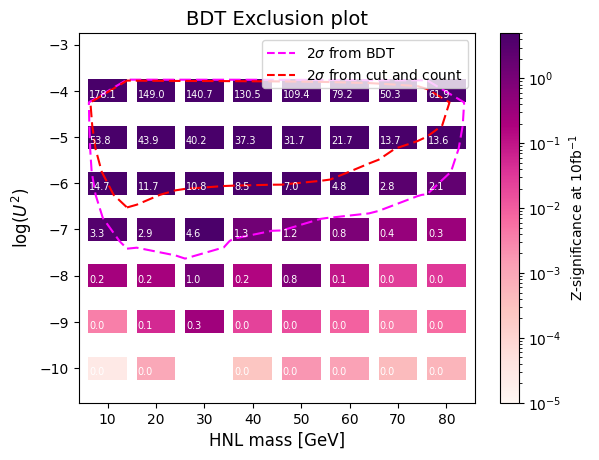

In [28]:
## xgboost run 17 ##

## RUN 12 Prompt Decay ###
## RUN 11 -- 15 GeeV Filter -- ##

## 22 March 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('BDT_results_run17.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        #bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points] # * 122.47 for 150 ab
    #bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    #print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear',fill_value=0)
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    """    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")"""
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from BDT'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("BDT Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_10fb_run17.pdf', format='pdf')
    plt.show()

make_hist_2D()



### PLOTTING FOR THE DNN

bdt cuts list [0.9066990752374531, 0.9998999980197804, 0.9792942306157641, 0.9898927380623075, 0.9863923796167513, 0.898998998998999, 0.96959813518164, 0.910041612895078, 0.9881998821769346, 0.9809883229411472, 0.8184607525129577, 0.9913990027836524, 0.9240992475165571, 0.9619993890632624, 0.9711990670501832, 0.9301993079132626, 0.9994999940593412, 0.9903999039593501, 0.9452993933638211, 0.9553635443923486, 0.925599262368204, 0.9971999524986371, 0.9732765114095181, 0.9829991458356043, 0.9734759857757929, 0.9891998920780325, 0.9246704463043045, 0.977499749613692, 0.9880998811868248, 0.9012990217715243, 0.898998998998999, 0.9356993623692932, 0.9563995673220204, 0.98139518445925, 0.9467994722714802, 0.96017097014738, 0.898998998998999, 0.9283992900912783, 0.9039990485044888, 0.39899899899899904, 0.09309309309309309, 0.39899899899899904, 0.898998998998999, 0.9776998179769365, 0.9146991544462366, 0.9021990306825124, 0.9677996801945368, 0.22122122122122123, 0.16016016016016016, 0.97829978415

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/1261548505.py:86: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/1261548505.py:87: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


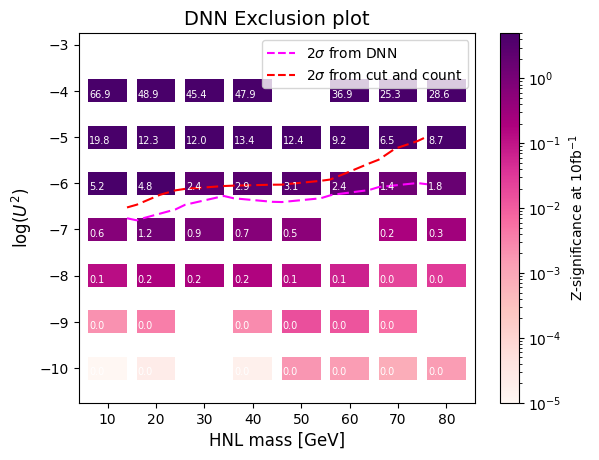

In [45]:
### DNN RUN 1 ###

## APRIL 5 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('DNN_results_run1.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[0].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[1].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from DNN'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("DNN Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_DNN_10fb_run1.pdf', format='pdf')
    plt.show()

make_hist_2D()



bdt cuts list [0.9039890947720983, 0.9998999980197804, 0.8307756997706996, 0.9662996653428899, 0.08699345, 0.9999999990098902, 0.8917466309837211, 0.8378351884526601, 0.998899985291621, 0.9816996444266997, 0.9723997094250871, 0.9463993734277932, 0.9940999405934123, 0.932599093142585, 0.39899899899899904, 0.8785303490680316, 0.9091803510619844, 0.8918695633380512, 0.932899334646219, 0.8490009028528529, 0.9069990782077825, 0.9999999990098902, 0.9200992079121654, 0.9025824719102629, 0.9690922470111545, 0.9994999940593412, 0.09309309309309309, 0.9999999990098902, 0.9028663966168777, 0.8997990069198774, 0.9890998910879227, 0.9003981226751476, 0.9570995742527889, 0.8574172498669042, 0.9998999980197804, 0.9531871102778844, 0.8532501573700363, 0.842075847447982, 0.9927999277219851, 0.9280701326820464, 0.8884648256558385, 0.9894998950483619, 0.9999999990098902, 0.9996999960395608]
Area enclosed by BDT 2σ contour: -413.84908044734436
Area enclosed by Cut and Count 2σ contour: -365.77418875422234

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/783836202.py:86: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/783836202.py:87: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


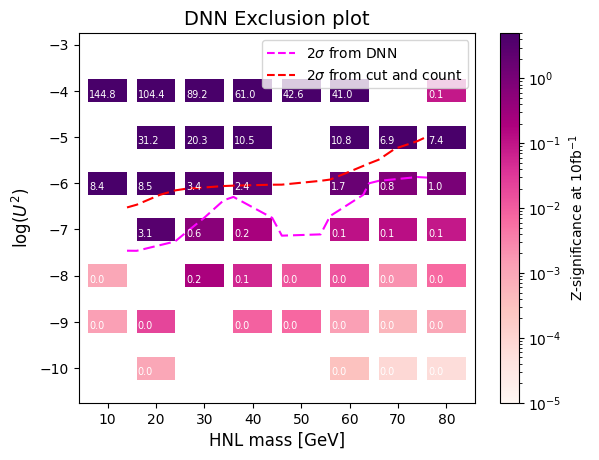

In [115]:
### DNN RUN 1 ###

## APRIL 5 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('DNN_results_run2.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[0].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[1].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from DNN'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("DNN Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_DNN_10fb_run1.pdf', format='pdf')
    plt.show()

make_hist_2D()



bdt cuts list [0.8034776902413583, 0.8034776902413583, 0.8034776902413583, 0.8034776902413583, 0.8034776902413583, 0.8034776902413583, 0.8034776902413583, 0.8034776902413583, 0.8034776902413583, 0.8034776902413583, 0.8034776902413583, 0.9039890947720983, 0.9998999980197804, 0.8307756997706996, 0.9662996653428899, 0.08699345, 0.9999999990098902, 0.8917466309837211, 0.8378351884526601, 0.998899985291621, 0.9816996444266997, 0.9723997094250871, 0.9463993734277932, 0.9940999405934123, 0.932599093142585, 0.39899899899899904, 0.8785303490680316, 0.9091803510619844, 0.8918695633380512, 0.932899334646219, 0.8490009028528529, 0.9069990782077825, 0.9999999990098902, 0.9200992079121654, 0.9025824719102629, 0.9690922470111545, 0.9994999940593412, 0.09309309309309309, 0.9999999990098902, 0.9028663966168777, 0.8997990069198774, 0.9890998910879227, 0.9003981226751476, 0.9570995742527889, 0.8574172498669042, 0.9998999980197804, 0.9531871102778844, 0.8532501573700363, 0.842075847447982, 0.9927999277219

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/32510712.py:86: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_87821/32510712.py:87: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


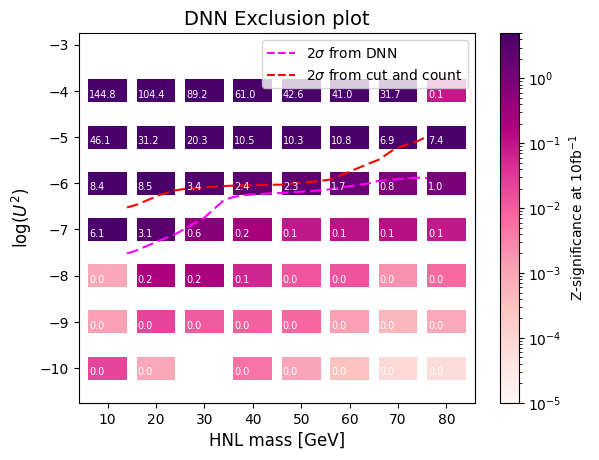

In [123]:
### DNN RUN 1 ###

## APRIL 5 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('DNN_results_run2_copy.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[0].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[1].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from DNN'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("DNN Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_DNN_10fb_run1.pdf', format='pdf')
    plt.show()

make_hist_2D()



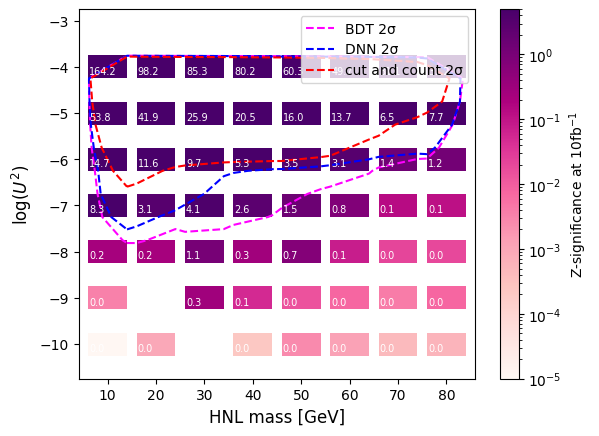

In [134]:
## comparing BDT and DNN ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

# Load the data for BDT, LLP, and Prompt from JSON files
with open('test_xgboost_results12_10fb.json', 'r') as file:
    data_bdt = json.load(file)
with open('DNN_results_run2_copy.json', 'r') as file:
    data_llp = json.load(file)

def make_hist_2D():
    # Initialize lists to hold the processed data
    bdt_points, llp_points = [], []

    # Process the data from BDT
    for key, value in data_bdt.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        bdt_points.append((mass, angle * 2, highest_significance))

    # Process the data from LLP
    for key, value in data_llp.items():
        parts = key.split('_')
        mass = float(parts[0].replace('GeV', ''))
        angle = float(parts[1].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        llp_points.append((mass, angle * 2, highest_significance))
   
    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.7015996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 0.001475996382017464], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.304537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 0.004537376980651871], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.2033373434392724114], ["30", -8.0, 0.029476881359299892],["30", -9.0, 0.0033373434392724114], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.2029276961561613734], ["40", -8.0, 0.02821520628356613],["40", -9.0, 0.0029276961561613734], ["40", -10.0, 3.352827837383747e-05], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.203920231273620948], ["50", -8.0, 0.03817629371414823],["50", -9.0, 0.003920231273620948], ["50", -10.0, 2.352827837383747e-05], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.13230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 0.00230040705768753], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0408222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 0.0008222118582734013], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 0.00423984398430349], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 9.878873485179866e-06], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Prepare the bins and ranges
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)
    x_range = (0, 90)
    y_range = (-11, -3)

    # Convert to numpy arrays for griddata
    masses_bdt, angles_bdt, significances_bdt = map(np.array, zip(*bdt_points))
    masses_llp, angles_llp, significances_llp = map(np.array, zip(*llp_points))

    # Create the grids for contour plotting
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    # Interpolate the z-values for contour plotting
    z_interp_bdt = griddata((masses_bdt, angles_bdt), significances_bdt, (x_grid, y_grid), method='linear', fill_value=0)
    z_interp_llp = griddata((masses_llp, angles_llp), significances_llp, (x_grid, y_grid), method='linear', fill_value=0)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu


    plt.hist2d(masses_bdt, angles_bdt, bins=n_bins, range=[x_range, y_range], weights=significances_bdt, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses_bdt, angles_bdt), bins=n_bins, range=[x_range, y_range], weights=significances_bdt)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')

    # Plot the contours for BDT, LLP, and Prompt
    plt.contour(x_grid, y_grid, z_interp_bdt, levels=[2], colors='magenta', linestyles='dashed')
    plt.contour(x_grid, y_grid, z_interp_llp, levels=[2], colors='blue', linestyles='dashed')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    plt.contour(x_grid, y_grid, z_cut_count, levels=[2], colors='red', linestyles='dashed')
    # Add legend for the contours
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='BDT 2σ'),
                       Line2D([0], [0], color='blue', linestyle='dashed', label='DNN 2σ'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='cut and count 2σ')]
    plt.legend(handles=legend_elements, loc='upper right')


    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    # Add labels and title
    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)

    # Save the plot
    plt.savefig('dnn_cut_bdt_attempt1.pdf', format='pdf')
    plt.show()

make_hist_2D()


bdt cuts list [0.9998999980197804, 0.9996999960395608, 0.9999999990098902, 0.9999999990098902, 0.9990999883319887, 0.999799986251499, 0.9999999990098902, 0.9988999881186824, 0.9999999990098902, 0.9997999970296706, 0.9999999990098902, 0.999099990098902, 0.9997999970296706, 0.9999999990098902, 0.9998999980197804, 0.9999999990098902, 0.9999999990098902, 0.9992999920791217, 0.9998999980197804, 0.9999999990098902, 0.9984999841582433, 0.9998999980197804, 0.9998999980197804, 0.9999999990098902, 0.9990999889209599, 0.9999999990098902, 0.9993999930692314, 0.9999999990098902, 0.999099990098902, 0.9999999990098902, 0.9998999980197804, 0.9998999980197804, 0.9999999990098902, 0.9996999960395608, 0.9999999990098902, 0.9995999576497847, 0.9998999980197804, 0.9998999980197804, 0.9998999980197804, 0.9999999990098902, 0.999699992976911, 0.9999999990098902, 0.9998999980197804, 0.9998999980197804, 0.9998999980197804, 0.9956999564351691, 0.9999999990098902, 0.999599995049451, 0.9999999990098902, 0.99989999

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76150/1436826862.py:88: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76150/1436826862.py:89: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


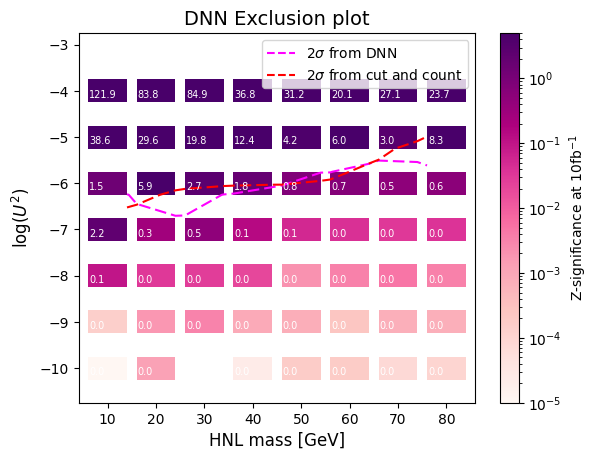

In [50]:
## DNN run 4 ##

### DNN RUN 1 ###

## APRIL 5 2024 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('DNN_results_run4.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[0].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[1].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear')
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    area_difference = area_contour - area_cc

    print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    percentage_improvement = (area_difference / area_cc) * 100

    print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from DNN'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("DNN Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_DNN_10fb_firstattempt.pdf', format='pdf')
    plt.show()

make_hist_2D()



bdt cuts list [0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.9848904595344783, 0.898998998998999, 0.9882998831670444, 0.6647994416309506, 0.968783121448431, 0.0, 0.916899176228652, 0.9742997445516733, 0.9982999821780237, 0.953278396947863, 0.8886118964747981, 0.9822927326590061, 0.9986999861384629, 0.029029029029029027, 0.9885998861373737, 0.9586951053765618, 0.9817863071487439, 0.980393694282809, 0.9921994258298777, 0.9720953906029367, 0.9946959887713205, 0.9959999497463721, 0.9853968339144824, 0.9525948727327436, 0.9901999019791304, 0.9668996712835486, 0.9329993356363288, 0.9928999287120949, 0.9053945223559636, 0.9977999772274747, 0.9877906468447292, 0.9795899121587723, 0.9993999930692314, 0.9925999257417655, 0.9840964739807864, 0.9853966236302256, 0.9188982658845682, 0.9890998910879227, 0.9459994643506019, 0.898998998998999, 0.9963999633659376, 0.93

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76150/2558956218.py:84: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_76150/2558956218.py:85: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


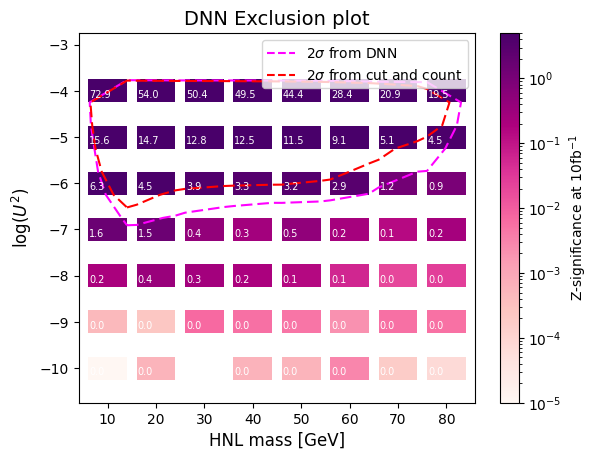

In [48]:
## run 6 results 1/5/24 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('DNN_results_run11.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[0].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[1].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear',fill_value=0)
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    #area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    #area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    #area_difference = area_contour - area_cc

    #print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    #print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    #print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    #percentage_improvement = (area_difference / area_cc) * 100

    #print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from DNN'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("DNN Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('exclusionplot_DNN_10fb_run11.pdf', format='pdf')
    plt.show()

make_hist_2D()



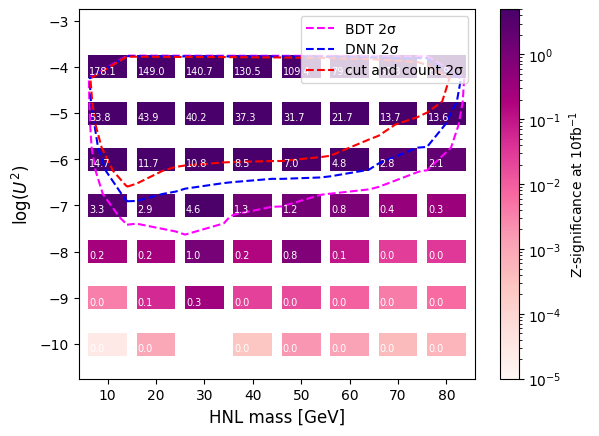

In [49]:
## comparing BDT and DNN ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

# Load the data for BDT, LLP, and Prompt from JSON files
with open('BDT_results_run17.json', 'r') as file:
    data_bdt = json.load(file)
with open('DNN_results_run11.json', 'r') as file:
    data_llp = json.load(file)

def make_hist_2D():
    # Initialize lists to hold the processed data
    bdt_points, llp_points = [], []

    # Process the data from BDT
    for key, value in data_bdt.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        bdt_points.append((mass, angle * 2, highest_significance))

    # Process the data from LLP
    for key, value in data_llp.items():
        parts = key.split('_')
        mass = float(parts[0].replace('GeV', ''))
        angle = float(parts[1].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        llp_points.append((mass, angle * 2, highest_significance))
   
    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.7015996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 0.001475996382017464], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.304537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 0.004537376980651871], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.2033373434392724114], ["30", -8.0, 0.029476881359299892],["30", -9.0, 0.0033373434392724114], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.2029276961561613734], ["40", -8.0, 0.02821520628356613],["40", -9.0, 0.0029276961561613734], ["40", -10.0, 3.352827837383747e-05], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.203920231273620948], ["50", -8.0, 0.03817629371414823],["50", -9.0, 0.003920231273620948], ["50", -10.0, 2.352827837383747e-05], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.13230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 0.00230040705768753], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0408222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 0.0008222118582734013], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 0.00423984398430349], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 9.878873485179866e-06], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Prepare the bins and ranges
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)
    x_range = (0, 90)
    y_range = (-11, -3)

    # Convert to numpy arrays for griddata
    masses_bdt, angles_bdt, significances_bdt = map(np.array, zip(*bdt_points))
    masses_llp, angles_llp, significances_llp = map(np.array, zip(*llp_points))

    # Create the grids for contour plotting
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    # Interpolate the z-values for contour plotting
    z_interp_bdt = griddata((masses_bdt, angles_bdt), significances_bdt, (x_grid, y_grid), method='linear', fill_value=0)
    z_interp_llp = griddata((masses_llp, angles_llp), significances_llp, (x_grid, y_grid), method='linear', fill_value=0)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu


    plt.hist2d(masses_bdt, angles_bdt, bins=n_bins, range=[x_range, y_range], weights=significances_bdt, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses_bdt, angles_bdt), bins=n_bins, range=[x_range, y_range], weights=significances_bdt)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')

    # Plot the contours for BDT, LLP, and Prompt
    plt.contour(x_grid, y_grid, z_interp_bdt, levels=[2], colors='magenta', linestyles='dashed')
    plt.contour(x_grid, y_grid, z_interp_llp, levels=[2], colors='blue', linestyles='dashed')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    plt.contour(x_grid, y_grid, z_cut_count, levels=[2], colors='red', linestyles='dashed')
    # Add legend for the contours
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='BDT 2σ'),
                       Line2D([0], [0], color='blue', linestyle='dashed', label='DNN 2σ'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='cut and count 2σ')]
    plt.legend(handles=legend_elements, loc='upper right')


    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    # Add labels and title
    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)

    # Save the plot
    plt.savefig('dnn_cut_bdt.pdf', format='pdf')
    plt.show()

make_hist_2D()


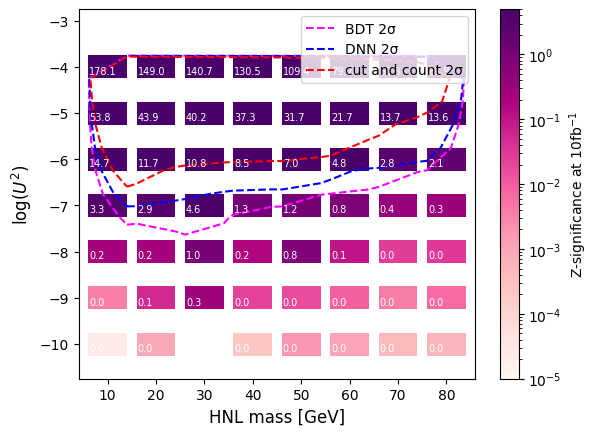

In [2]:
## comparing BDT and DNN ##

# Run 12 -- no optimisation -- May 14

# This run is from the data in run 11 which contains 50/50 split for bb, cc, and 4body as well as signal

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

# Load the data for BDT, LLP, and Prompt from JSON files
with open('BDT_results_run17.json', 'r') as file:
    data_bdt = json.load(file)
with open('DNN_results_run12.json', 'r') as file:
    data_llp = json.load(file)

def make_hist_2D():
    # Initialize lists to hold the processed data
    bdt_points, llp_points = [], []

    # Process the data from BDT
    for key, value in data_bdt.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        bdt_points.append((mass, angle * 2, highest_significance))

    # Process the data from LLP
    for key, value in data_llp.items():
        parts = key.split('_')
        mass = float(parts[0].replace('GeV', ''))
        angle = float(parts[1].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        highest_significance *= 1.2
        llp_points.append((mass, angle * 2, highest_significance))
   
    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.7015996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 0.001475996382017464], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.304537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 0.004537376980651871], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.2033373434392724114], ["30", -8.0, 0.029476881359299892],["30", -9.0, 0.0033373434392724114], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.2029276961561613734], ["40", -8.0, 0.02821520628356613],["40", -9.0, 0.0029276961561613734], ["40", -10.0, 3.352827837383747e-05], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.203920231273620948], ["50", -8.0, 0.03817629371414823],["50", -9.0, 0.003920231273620948], ["50", -10.0, 2.352827837383747e-05], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.13230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 0.00230040705768753], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0408222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 0.0008222118582734013], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 0.00423984398430349], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 9.878873485179866e-06], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Prepare the bins and ranges
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)
    x_range = (0, 90)
    y_range = (-11, -3)

    # Convert to numpy arrays for griddata
    masses_bdt, angles_bdt, significances_bdt = map(np.array, zip(*bdt_points))
    masses_llp, angles_llp, significances_llp = map(np.array, zip(*llp_points))

    # Create the grids for contour plotting
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    # Interpolate the z-values for contour plotting
    z_interp_bdt = griddata((masses_bdt, angles_bdt), significances_bdt, (x_grid, y_grid), method='linear', fill_value=0)
    z_interp_llp = griddata((masses_llp, angles_llp), significances_llp, (x_grid, y_grid), method='linear', fill_value=0)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu


    plt.hist2d(masses_bdt, angles_bdt, bins=n_bins, range=[x_range, y_range], weights=significances_bdt, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses_bdt, angles_bdt), bins=n_bins, range=[x_range, y_range], weights=significances_bdt)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')

    # Plot the contours for BDT, LLP, and Prompt
    plt.contour(x_grid, y_grid, z_interp_bdt, levels=[2], colors='magenta', linestyles='dashed')
    plt.contour(x_grid, y_grid, z_interp_llp, levels=[2], colors='blue', linestyles='dashed')
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    plt.contour(x_grid, y_grid, z_cut_count, levels=[2], colors='red', linestyles='dashed')
    # Add legend for the contours
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='BDT 2σ'),
                       Line2D([0], [0], color='blue', linestyle='dashed', label='DNN 2σ'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='cut and count 2σ')]
    plt.legend(handles=legend_elements, loc='upper right')


    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    # Add labels and title
    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)

    # Save the plot
    plt.savefig('dnnJune.pdf', format='pdf')
    plt.show()

make_hist_2D()


bdt cuts list [0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.8928327146115842, 0.9848904595344783, 0.898998998998999, 0.9882998831670444, 0.6647994416309506, 0.968783121448431, 0.0, 0.916899176228652, 0.9742997445516733, 0.9982999821780237, 0.953278396947863, 0.8886118964747981, 0.9822927326590061, 0.9986999861384629, 0.029029029029029027, 0.9885998861373737, 0.9586951053765618, 0.9817863071487439, 0.980393694282809, 0.9921994258298777, 0.9720953906029367, 0.9946959887713205, 0.9959999497463721, 0.9853968339144824, 0.9525948727327436, 0.9901999019791304, 0.9668996712835486, 0.9329993356363288, 0.9928999287120949, 0.9053945223559636, 0.9977999772274747, 0.9877906468447292, 0.9795899121587723, 0.9993999930692314, 0.9925999257417655, 0.9840964739807864, 0.9853966236302256, 0.9188982658845682, 0.9890998910879227, 0.9459994643506019, 0.898998998998999, 0.9963999633659376, 0.93

/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_8101/2135795658.py:85: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
/var/folders/1l/7dk3svz97wdcq01rlzd7rzpc0000gn/T/ipykernel_8101/2135795658.py:86: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cc_points = cc_2sigma.collections[0].get_paths()[0].vertices


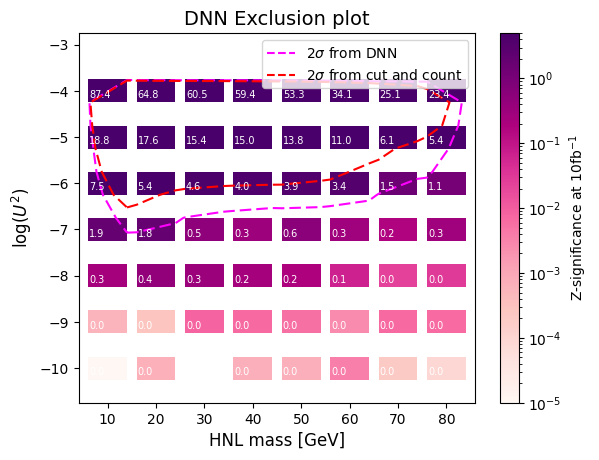

In [10]:
## run 6 results 1/5/24 ##

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

with open('DNN_results_run11.json', 'r') as file:
    
    data = json.load(file)
    
def make_hist_2D():

    #10 fb-1 data

    #data_points = [('10', -4.0, 27.778574889916563), ('10', -5.0, 7.9098872059916365), ('10', -6.0, 2.321909727607213), ('10', -7.0, 0.0009543498604278071), ('10', -8.0, 0.05579593603714217), ('10', -9.0, 6.016719461905977e-08), ('10', -10.0, 8.675845754470089e-06), ('20', -4.0, 17.845892334515295), ('20', -5.0, 5.108197588635191), ('20', -6.0, 1.0769853307552089), ('20', -7.0, 0.0018679408941489326), ('20', -8.0, 0.01952953104055794), ('20', -9.0, 6.401283052342732e-07), ('20', -10.0, 1.7086127338175105e-05), ('30', -4.0, 16.2862566546243), ('30', -5.0, 3.8699231500332623), ('30', -6.0, 0.7338425118418546), ('30', -7.0, 0.001109623620388535), ('30', -8.0, 0.010895638995044797), ('40', -4.0, 15.281028458541495), ('40', -5.0, 3.69548224976052), ('40', -6.0, 0.7348459050973114), ('40', -7.0, 0.0011912950804715996), ('40', -8.0, 0.011769179453659795), ('40', -10.0, 0), ('50', -4.0, 14.290300427271251), ('50', -5.0, 3.668737074259249), ('50', -6.0, 0.8216503610726512), ('50', -7.0, 0.0018133807230021758), ('50', -8.0, 0.01768896886838045), ('50', -10.0, 0), ('60', -4.0, 10.520843819835253), ('60', -5.0, 2.6176704965000233), ('60', -6.0, 0.5547729100572643), ('60', -7.0, 0.0010488922154181857), ('60', -8.0, 0.01024677129570917), ('60', -9.0, 1.0833692200417029e-05), ('60', -10.0, 0.00010498732308894972), ('70', -4.0, 5.771373976106098), ('70', -5.0, 1.31711669256286), ('70', -6.0, 0.24014289367746705), ('70', -7.0, 0.00033557696678828986), ('70', -8.0, 0.003338965933987431), ('70', -9.0, 3.3597480736752614e-06), ('70', -10.0, 3.3733149035896306e-05), ('80', -4.0, 0.4087316635166447), ('80', -5.0, 0.055734614012993344), ('80', -6.0, 0.005953706853334397), ('80', -7.0, 9.877514849343938e-06), ('80', -8.0, 6.052385900507629e-05), ('80', -9.0, 1.0858669922899504e-07), ('80', -10.0, 6.372843482819998e-07)]

    data_points = []

    for key, value in data.items():
        parts = key.split('_')
        mass = float(parts[0].replace('GeV', ''))  # Just take the number
        
        # Replace '1e-' with '-' and 'p' with '.'
        angle = float(parts[1].replace('1e-', '-').replace('p', '.'))
        highest_significance_entry = max(value['significance_list'], key=lambda x: x[0])
        highest_significance = highest_significance_entry[0]
        highest_significance *= 1.2
        bdt_cut = highest_significance_entry[2]  # Third entry of the significance_list

        data_points.append((mass, angle, highest_significance, bdt_cut))

    masses = [float(data[0]) for data in data_points]
    angles = [float(data[1] * 2) for data in data_points]
    #angles = [angle * 2 for angle in angles]  # Angle squared is 10^(2 * exponent)
    significances = [data[2] for data in data_points]
    bdt_cuts = [data[3] for data in data_points]

    x_range = (0, 90)
    y_range = (-11, -3)
    
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)

    n_bins = [x_bins, y_bins]

    print(f"bdt cuts list {bdt_cuts}")

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu

    plt.hist2d(masses, angles, bins=n_bins, range=[x_range, y_range], weights=significances, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses, angles), bins=n_bins, range=[x_range, y_range], weights=significances)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')
    #plt.colorbar.set_label("Z significance at  $150 \, \mathrm{ab}^{-1}$", fontsize = 12)
    ###delimiting line
    threshold = 2.0
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    ###former data from cut and count (cc)###

    data_points_cc = [["10", -4.0, 52.876748861276596], ["10", -5.0, 15.128775602656333], ["10", -6.0, 4.4804573585508045], ["10", -7.0, 0.001475996382017464], ["10", -8.0, 0.08968425151707608], ["10", -9.0, 5.99037429924615e-08], ["10", -10.0, 1.4097477838218989e-05], ["20", -4.0, 36.2857862213626], ["20", -5.0, 10.884431421876464], ["20", -6.0, 2.4678689415467248], ["20", -7.0, 0.004537376980651871], ["20", -8.0, 0.058997010448686465], ["20", -9.0, 1.163004130746887e-06], ["20", -10.0, 3.352827837383747e-05], ["30", -4.0, 32.92212247543547], ["30", -5.0, 8.315052417103097], ["30", -6.0, 1.7459934119249754], ["30", -7.0, 0.0033373434392724114], ["30", -8.0, 0.029476881359299892], ["40", -4.0, 29.429788400754102], ["40", -5.0, 7.506664142646672], ["40", -6.0, 1.5869986460516172], ["40", -7.0, 0.0029276961561613734], ["40", -8.0, 0.02821520628356613], ["40", -10.0, 0], ["50", -4.0, 25.62219372240296], ["50", -5.0, 6.763465781950523], ["50", -6.0, 1.5570028443548596], ["50", -7.0, 0.003920231273620948], ["50", -8.0, 0.03817629371414823], ["50", -10.0, 0], ["60", -4.0, 18.866071450665995], ["60", -5.0, 4.839367338887292], ["60", -6.0, 1.0775817568201167], ["60", -7.0, 0.00230040705768753], ["60", -8.0, 0.022811124653626037], ["60", -9.0, 2.3613377004847655e-05], ["60", -10.0, 0.0002345337086266546], ["70", -4.0, 11.254577646746137], ["70", -5.0, 2.7412790459120084], ["70", -6.0, 0.5486607337910216], ["70", -7.0, 0.0008222118582734013], ["70", -8.0, 0.008246616737636249], ["70", -9.0, 8.055020468869638e-06], ["70", -10.0, 8.326387828664493e-05], ["80", -4.0, 0.6762462099536374], ["80", -5.0, 0.09792341746750198], ["80", -6.0, 0.010659487433272599], ["80", -7.0, 9.878873485179866e-06], ["80", -8.0, 0.00010780352635664964], ["80", -9.0, 1.508599479535031e-07], ["80", -10.0, 1.2065998272242434e-06]]

    masses_cc = [float(data[0]) for data in data_points_cc]
    angles_cc = [float(data[1]) for data in data_points_cc]
    significances_cc = [data[2] for data in data_points_cc]

    # Perform the interpolation
    z_interp = griddata((masses, angles), significances, (x_grid, y_grid), method='linear',fill_value=0)
    z_cut_count = griddata((masses_cc, angles_cc), significances_cc, (x_grid, y_grid), method='linear',fill_value=0)
    # Contour lines
    contour_2sigma = plt.contour(x_grid, y_grid, z_interp, levels=[threshold], colors='magenta', linestyles='dashed')
    
    cc_2sigma = plt.contour(x_grid, y_grid, z_cut_count, levels=[threshold], colors='red', linestyles='dashed')
    #contour_5sigma = plt.contour(x_grid, y_grid, z_interp, levels=[5.0], colors='blue')
    
    # Identify the coordinates of the 2σ contours
    contour_points = contour_2sigma.collections[0].get_paths()[0].vertices
    cc_points = cc_2sigma.collections[0].get_paths()[0].vertices

    # Calculate the area enclosed by the contours
    #area_contour = auc(contour_points[:, 0], contour_points[:, 1])
    #area_cc = auc(cc_points[:, 0], cc_points[:, 1])

    # Find the difference in areas
    #area_difference = area_contour - area_cc

    #print(f"Area enclosed by BDT 2σ contour: {area_contour}")
    #print(f"Area enclosed by Cut and Count 2σ contour: {area_cc}")
    #print(f"Difference in areas: {area_difference}")
    # Find the difference in areas
    #percentage_improvement = (area_difference / area_cc) * 100

    #print(f"Percentage Improvement: {percentage_improvement:.2f}%")
    
    # Create legend entries
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='2$\sigma$ from DNN'),
                       Line2D([0], [0], color='red', linestyle='dashed', label='2$\sigma$ from cut and count')]
                       #Line2D([0], [0], color='blue', label='5$\sigma$')]

    plt.legend(handles=legend_elements, loc='upper right')

    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)
    plt.title("DNN Exclusion plot", fontsize=14)

    
    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    
    plt.savefig('DNN_cut_count.pdf', format='pdf')
    plt.show()

make_hist_2D()



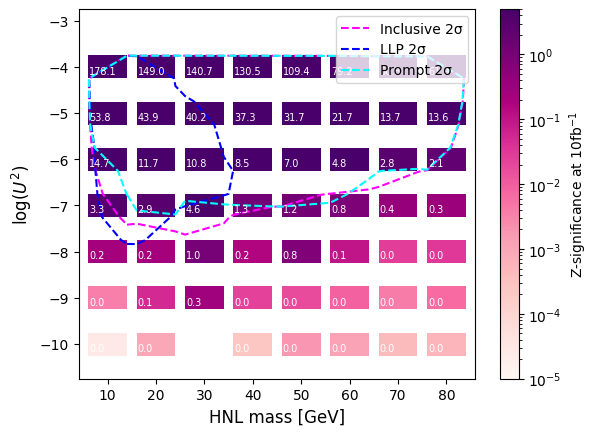

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.interpolate import griddata
from matplotlib.lines import Line2D
import json
from sklearn.metrics import auc

# Load the data for BDT, LLP, and Prompt from JSON files
with open('BDT_results_run17.json', 'r') as file:
    data_bdt = json.load(file)
with open('LLP_Run14Results.json', 'r') as file:
    data_llp = json.load(file)
with open('PromptDecayRun15Results.json', 'r') as file:
    data_prompt = json.load(file)

def make_hist_2D():
    # Initialize lists to hold the processed data
    bdt_points, llp_points, prompt_points = [], [], []

    # Process the data from BDT
    for key, value in data_bdt.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        bdt_points.append((mass, angle * 2, highest_significance))

    # Process the data from LLP
    for key, value in data_llp.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        llp_points.append((mass, angle * 2, highest_significance))

    # Process the data from Prompt
    for key, value in data_prompt.items():
        parts = key.split('_')
        mass = float(parts[1].replace('GeV', ''))
        angle = float(parts[2].replace('1e-', '-').replace('p', '.'))
        highest_significance = max(value['significance_list'], key=lambda x: x[0])[0]
        prompt_points.append((mass, angle * 2, highest_significance))

    # Prepare the bins and ranges
    x_bins = [4, 6, 14, 16, 24, 26, 34, 36, 44, 46, 54, 56, 64, 66, 74, 76, 84, 86]
    y_bins = np.arange(-10.75, -2.25, 0.5)
    x_range = (0, 90)
    y_range = (-11, -3)

    # Convert to numpy arrays for griddata
    masses_bdt, angles_bdt, significances_bdt = map(np.array, zip(*bdt_points))
    masses_llp, angles_llp, significances_llp = map(np.array, zip(*llp_points))
    masses_prompt, angles_prompt, significances_prompt = map(np.array, zip(*prompt_points))

    # Create the grids for contour plotting
    x_grid, y_grid = np.meshgrid(x_bins, y_bins)

    # Interpolate the z-values for contour plotting
    z_interp_bdt = griddata((masses_bdt, angles_bdt), significances_bdt, (x_grid, y_grid), method='linear', fill_value=0)
    z_interp_llp = griddata((masses_llp, angles_llp), significances_llp, (x_grid, y_grid), method='linear', fill_value=0)
    z_interp_prompt = griddata((masses_prompt, angles_prompt), significances_prompt, (x_grid, y_grid), method='linear', fill_value=0)

    n_bins = [x_bins, y_bins]

    norm = LogNorm(vmin=1e-5, vmax=5)

    cmap = plt.cm.RdPu


    plt.hist2d(masses_bdt, angles_bdt, bins=n_bins, range=[x_range, y_range], weights=significances_bdt, cmap=cmap, norm=norm)

    hist, edges = np.histogramdd((masses_bdt, angles_bdt), bins=n_bins, range=[x_range, y_range], weights=significances_bdt)
    x_edges, y_edges = edges
    
    plt.colorbar(label = 'Z-significance at $10 \mathrm{fb}^{-1}$')

    # Plot the contours for BDT, LLP, and Prompt
    plt.contour(x_grid, y_grid, z_interp_bdt, levels=[2], colors='magenta', linestyles='dashed')
    plt.contour(x_grid, y_grid, z_interp_llp, levels=[2], colors='blue', linestyles='dashed')
    plt.contour(x_grid, y_grid, z_interp_prompt, levels=[2], colors='cyan', linestyles='dashed')

    # Add legend for the contours
    legend_elements = [Line2D([0], [0], color='magenta', linestyle='dashed', label='Inclusive 2σ'),
                       Line2D([0], [0], color='blue', linestyle='dashed', label='LLP 2σ'),
                       Line2D([0], [0], color='cyan', linestyle='dashed', label='Prompt 2σ')]
    plt.legend(handles=legend_elements, loc='upper right')


    for i in range(len(x_edges) -1):
        for j in range(len(y_edges) -1):
            if hist[i, j] > 0:
                plt.text(x_edges[i] +0.2, y_edges[j]+0.1, f'{hist[i, j]:.1f}', color='white', fontsize = 7)

    # Add labels and title
    plt.xlabel("HNL mass [GeV]", fontsize=12)
    plt.ylabel("log($U^2$)", fontsize=12)

    # Save the plot
    plt.savefig('llp_prompt.pdf', format='pdf')
    plt.show()

make_hist_2D()
